<a href="https://colab.research.google.com/github/Alice188912/Alice-Digital-Humanities-Repository/blob/main/DH_Leiden_Stylometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first thing to do is to import Python libraries. A Python library is a collection of related modules.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df = pd.read_csv("My_dataset.csv")




What's in the dataset?

In [ ]:
print(df.head)

<bound method NDFrame.head of     id                                               book  \
0    0                                         L'umorismo   
1    1                                         L'umorismo   
2    2                                         L'umorismo   
3    3                                         L'umorismo   
4    4                                         L'umorismo   
5    5                                         L'umorismo   
6    6                                         L'umorismo   
7    7                                         L'umorismo   
8    8                                         L'umorismo   
9    9                                         L'umorismo   
10  10  Discorso sopra lo stato presente del costume d...   
11  11  Discorso sopra lo stato presente del costume d...   
12  12                               La coscienza di Zeno   
13  13                               La coscienza di Zeno   
14  14                               La coscienza di Ze

In [ ]:
print(df.head(5))

   id        book                                               text  \
0   0  L'umorismo  Alessandro D’Ancona, in quel suo notissimo stu...   
1   1  L'umorismo  Prima di entrare a parlar dell’essenza, dei ca...   
2   2  L'umorismo  Nel Cap. VIII del libro Notes sur l’Angleterre...   
3   3  L'umorismo  Giacomo Barzellotti, nel suo volume Dal Rinasc...   
4   4  L'umorismo  Quando il Brunetière, su la Revue des Deux Mon...   

             author  
0  Luigi Pirandello  
1  Luigi Pirandello  
2  Luigi Pirandello  
3  Luigi Pirandello  
4  Luigi Pirandello  


Let's read the number of raws and columns in the dataset

In [ ]:
print(df.shape)

(51, 4)


Let's read the name of the columns

In [ ]:
print(df.columns)

Index(['id', 'book', 'text', 'author'], dtype='object')


Let's see the name of the authors

In [ ]:
df["author"].unique()

array(['Luigi Pirandello', 'Giacomo Leopardi', 'Italo Svevo',
       'Ugo Foscolo', 'Sconosciuto'], dtype=object)

Let's read the title of texts written by a randomly chosen author

In [ ]:
df[df["author"] == "Italo Svevo"]

,id,book,text,author
12,12,La coscienza di Zeno,Vedere la mia infanzia? Piú di dieci lustri me...,Italo Svevo
13,13,La coscienza di Zeno,Io sono il dottore di cui in questa novella si...,Italo Svevo
14,14,La coscienza di Zeno,Il dottore al quale ne parlai mi disse d’inizi...,Italo Svevo
15,15,La coscienza di Zeno,Il dottore è partito ed io davvero non so se l...,Italo Svevo
16,16,La coscienza di Zeno,"Lo sapevo anch’io, ma non lo dissi per non far...",Italo Svevo
17,17,La coscienza di Zeno,Nella mente di un giovine di famiglia borghese...,Italo Svevo
18,18,La coscienza di Zeno,Quella prima volta io guardai Ada con un solo ...,Italo Svevo
19,19,La coscienza di Zeno,V’era ancora la possibilità di ritornare a que...,Italo Svevo
20,20,La coscienza di Zeno,Io l’avrei odiato anche se Ada non fosse stata...,Italo Svevo
21,21,La coscienza di Zeno,Il mio destino volle che mentre tutti ancora s...,Italo Svevo


Create a single list with all the documents written by one author. corpus_Pirandello in Python is a variable. A variable is a label that you can assign a value to it.

In [ ]:
corpus_Pirandello = df[df["author"] == "Luigi Pirandello"]["text"].tolist()

print(corpus_Pirandello)

["Alessandro D’Ancona, in quel suo notissimo studio su Cecco Angiolieri da Siena,1 dopo aver notato quanto vi sia di burlesco in questo nostro poeta del sec. XIII, osserva: «Ma per noi l’Angiolieri non è soltanto un burlesco: bensì anche, e più propriamente, un umorista. E qui i camarlinghi della favella ci faccian pure il viso dell’arme, ma non pretendano di dire che in italiano bisogna rassegnarsi a non dir la cosa, perchè non abbiam la parola».\r\n\r\nE, accortamente, in una nota a pie’ di pagina,2 soggiunge: «È curioso però che il traduttore francese di una dissertazione tedesca sull’Humour, inserita nel Recueil de piéces intéressantes, concernant les antiquités, les beaux-artes, les belles-lettres et la philosophie, traduites de differéntes langues, citando il Riedel, Theor. d. Schöne Kunsten, I. artic. Laune, sostenga che sebbene gli Inglesi, ed il Congreve in particolare, rivendichino per sè i vocaboli humour e humourist «il est néammoins certain qu’ ils viennent de l’italien».\

Create a document from the list

In [ ]:
L_Umorismo = " ".join(corpus_Pirandello)

print(L_Umorismo)

Alessandro D’Ancona, in quel suo notissimo studio su Cecco Angiolieri da Siena,1 dopo aver notato quanto vi sia di burlesco in questo nostro poeta del sec. XIII, osserva: «Ma per noi l’Angiolieri non è soltanto un burlesco: bensì anche, e più propriamente, un umorista. E qui i camarlinghi della favella ci faccian pure il viso dell’arme, ma non pretendano di dire che in italiano bisogna rassegnarsi a non dir la cosa, perchè non abbiam la parola».

E, accortamente, in una nota a pie’ di pagina,2 soggiunge: «È curioso però che il traduttore francese di una dissertazione tedesca sull’Humour, inserita nel Recueil de piéces intéressantes, concernant les antiquités, les beaux-artes, les belles-lettres et la philosophie, traduites de differéntes langues, citando il Riedel, Theor. d. Schöne Kunsten, I. artic. Laune, sostenga che sebbene gli Inglesi, ed il Congreve in particolare, rivendichino per sè i vocaboli humour e humourist «il est néammoins certain qu’ ils viennent de l’italien».

E quind

We can also define a function. A function in Python is a block of code which only runs when it is called.

In [ ]:
def build_corpus_for_author(author_name):
  text_data = df[df["author"] == author_name]["text"].tolist()
  resulting_corpus = " ".join(text_data)
  return resulting_corpus

In [ ]:
Corpus_Pirandello = build_corpus_for_author("Luigi Pirandello")
print(Corpus_Pirandello)

Alessandro D’Ancona, in quel suo notissimo studio su Cecco Angiolieri da Siena,1 dopo aver notato quanto vi sia di burlesco in questo nostro poeta del sec. XIII, osserva: «Ma per noi l’Angiolieri non è soltanto un burlesco: bensì anche, e più propriamente, un umorista. E qui i camarlinghi della favella ci faccian pure il viso dell’arme, ma non pretendano di dire che in italiano bisogna rassegnarsi a non dir la cosa, perchè non abbiam la parola».

E, accortamente, in una nota a pie’ di pagina,2 soggiunge: «È curioso però che il traduttore francese di una dissertazione tedesca sull’Humour, inserita nel Recueil de piéces intéressantes, concernant les antiquités, les beaux-artes, les belles-lettres et la philosophie, traduites de differéntes langues, citando il Riedel, Theor. d. Schöne Kunsten, I. artic. Laune, sostenga che sebbene gli Inglesi, ed il Congreve in particolare, rivendichino per sè i vocaboli humour e humourist «il est néammoins certain qu’ ils viennent de l’italien».

E quind

Let's generate a corpus per each author in our dataset

In [ ]:
Corpus_Pirandello = build_corpus_for_author("Luigi Pirandello")
Corpus_Foscolo = build_corpus_for_author("Ugo Foscolo")
Corpus_Svevo = build_corpus_for_author("Italo Svevo")
Corpus_Leopardi = build_corpus_for_author("Giacomo Leopardi")
Unknown = build_corpus_for_author("Sconosciuto")

print(Unknown)

L’ombra, poi man mano il bujo avevano invaso la stanza, ove la madre aveva accolto Marta scacciata dal marito. Nel bujo, la suppellettile di vetro su la tavola, già apparecchiata per la cena, prima dell’arrivo di Marta, ritraeva dalla strada qualche fil di luce.

La signora Agata Ajala, altissima di statura e corpulenta, ma con una dolcezza nello sguardo e nella voce, che pareva volesse subito attenuare in chi la guardava o le parlava l’impressione sgradevole che il suo corpo per forza doveva destare; rientrando dalla saletta, dove poc’anzi la avevano chiamata, intravide all’improvviso lume, nell’aprir l’uscio, le due figliuole sul canapè di fronte: Marta, con un fazzoletto sul volto, abbandonata su la spalliera, e Maria che le teneva una mano, china su lei.

— Vuol partire.... — annunziò, quasi istupidita dall’inattesa sciagura.

— Mamma, ha saputo.... ha saputo, — disse allora Marta, scrollando il capo e torcendosi le mani. — Ha saputo e non vuol più tornare a casa. Egli non perdona,

**TEXT ANALYSIS**



Word count

In [ ]:
from collections import Counter
Counter(Corpus_Foscolo.split())

Counter({'Pubblicando': 1,
         'queste': 47,
         'Lettere,': 1,
         'io': 406,
         'tento': 3,
         'di': 1197,
         'erigere': 2,
         'un': 354,
         'monumento': 1,
         'alla': 128,
         'virtù': 23,
         'sconosciuta;': 1,
         'e': 1969,
         'consecrare': 2,
         'memoria': 12,
         'del': 262,
         'solo': 40,
         'amico': 20,
         'mio': 206,
         'quelle': 30,
         'lagrime,': 10,
         'che': 956,
         'ora': 43,
         'mi': 630,
         'si': 296,
         'vieta': 1,
         'spargere': 1,
         'su': 128,
         'la': 1047,
         'sua': 135,
         'sepoltura.': 3,
         'E': 136,
         'tu,': 19,
         'o': 165,
         'Lettore,': 3,
         'se': 231,
         'uno': 32,
         'non': 772,
         'sei': 22,
         'coloro': 8,
         'esigono': 1,
         'dagli': 20,
         'altri': 30,
         'quell’eroismo': 1,
         'cui': 49,
      

Most common words used by an author

In [ ]:
Counter(Corpus_Foscolo.split()).most_common(50)

[('e', 1969),
 ('di', 1197),
 ('la', 1047),
 ('che', 956),
 ('non', 772),
 ('il', 729),
 ('—', 698),
 ('le', 696),
 ('a', 632),
 ('mi', 630),
 ('per', 465),
 ('io', 406),
 ('un', 354),
 ('in', 354),
 ('i', 346),
 ('della', 306),
 ('si', 296),
 ('con', 290),
 ('del', 262),
 ('ma', 262),
 ('più', 261),
 ('gli', 255),
 ('da', 254),
 ('è', 237),
 ('se', 231),
 ('tu', 231),
 ('mia', 213),
 ('mio', 206),
 ('una', 175),
 ('ed', 175),
 ('sono', 166),
 ('o', 165),
 ('ti', 163),
 ('al', 158),
 ('de’', 154),
 ('come', 154),
 ('lo', 149),
 ('ho', 146),
 ('ch’io', 144),
 ('nè', 144),
 ('suo', 142),
 ('E', 136),
 ('sua', 135),
 ('alla', 128),
 ('su', 128),
 ('me', 122),
 ('nel', 121),
 ('tutto', 109),
 ('Ma', 108),
 ('ha', 106)]

Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
print(stopwords.words('italian'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("italian"))
 
Foscolo_with_stopwords = word_tokenize(Corpus_Foscolo)
 
Foscolo_without_stopwords = [w for w in Foscolo_with_stopwords if not w.lower() in stop_words]
 
Foscolo_without_stopwords = []
 
for w in Foscolo_with_stopwords:
    if w not in stop_words:
        Foscolo_without_stopwords.append(w)
 
print(Foscolo_with_stopwords)
print(Foscolo_without_stopwords)

['Pubblicando', 'queste', 'Lettere', ',', 'io', 'tento', 'di', 'erigere', 'un', 'monumento', 'alla', 'virtù', 'sconosciuta', ';', 'e', 'di', 'consecrare', 'alla', 'memoria', 'del', 'solo', 'amico', 'mio', 'quelle', 'lagrime', ',', 'che', 'ora', 'mi', 'si', 'vieta', 'di', 'spargere', 'su', 'la', 'sua', 'sepoltura', '.', 'E', 'tu', ',', 'o', 'Lettore', ',', 'se', 'uno', 'non', 'sei', 'di', 'coloro', 'che', 'esigono', 'dagli', 'altri', 'quell', '’', 'eroismo', 'di', 'cui', 'non', 'sono', 'eglino', 'stessi', 'capaci', ',', 'darai', ',', 'spero', ',', 'la', 'tua', 'compassione', 'al', 'giovane', 'infelice', ',', 'dal', 'quale', 'potrai', 'forse', 'trarre', 'esempio', 'e', 'conforto', '.', 'Il', 'sacrificio', 'della', 'patria', 'nostra', 'è', 'consumato', ':', 'tutto', 'è', 'perduto', ';', 'e', 'la', 'vita', ',', 'seppure', 'ne', 'verrà', 'concessa', ',', 'non', 'ci', 'resterà', 'che', 'per', 'piangere', 'le', 'nostre', 'sciagure', 'e', 'la', 'nostra', 'infamia', '.', 'Il', 'mio', 'nome', 'è

Most common words in "La coscienza di Zeno" by Italo Svevo

In [ ]:
from collections import Counter

split_it = Foscolo_without_stopwords

Counter = Counter(split_it)

most_occur = Counter.most_common(1000000)

print(most_occur)

[(',', 3331), ('’', 2113), ('.', 1674), (';', 858), ('—', 698), (':', 546), ('!', 394), ('?', 376), ('ch', 216), ('me', 196), ('d', 180), ('Teresa', 162), ('de', 154), ('nè', 144), ('E', 139), ('s', 133), ('sempre', 128), ('mai', 127), ('cuore', 123), ('*', 119), ('forse', 118), ('Ma', 110), ('fra', 103), ('vita', 97), ('perchè', 94), ('Io', 92), ('quel', 91), ('senza', 89), ('m', 88), ('quando', 86), ('te', 82), ('occhi', 79), ('poi', 79), ('Lorenzo', 78), ('altro', 71), ('anima', 70), ('ora', 67), ('Il', 66), ('morte', 66), ('pur', 65), ('padre', 65), ('Non', 63), ('così', 63), ('so', 62), ('madre', 62), ('uomini', 62), ('ogni', 62), ('tempo', 61), ('dopo', 61), ('giorno', 60), ('casa', 60), ('solo', 58), ('lagrime', 58), ('mano', 58), ('La', 57), ('quasi', 57), ('Jacopo', 57), ('tutta', 56), ('egli', 56), ('ei', 56), ('ancora', 54), ('que', 54), ('tutte', 54), ('quali', 52), ('natura', 52), ('cielo', 52), ('sì', 51), ('stesso', 50), ('notte', 50), ('sera', 49), ('O', 49), ('prima', 

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("italian"))
 
Foscolo_with_stopwords = word_tokenize(Corpus_Foscolo)
Leopardi_with_stopwords = word_tokenize(Corpus_Leopardi)
Pirandello_with_stopwords = word_tokenize(Corpus_Pirandello)
Svevo_with_stopwords = word_tokenize(Corpus_Svevo)
Unknown_with_stopwords = word_tokenize(Unknown)

Foscolo_without_stopwords = [w for w in Foscolo_with_stopwords if not w.lower() in stop_words]
Leopardi_without_stopwords = [w for w in Leopardi_with_stopwords if not w.lower() in stop_words]
Pirandello_without_stopwords = [w for w in Pirandello_with_stopwords if not w.lower() in stop_words]
Svevo_without_stopwords = [w for w in Svevo_with_stopwords if not w.lower() in stop_words]
Sconosciuto_without_stopwords = [w for w in Unknown_with_stopwords if not w.lower() in stop_words]
 
Foscolo_without_stopwords = []
Leopardi_without_stopwords = []
Pirandello_without_stopwords = []
Svevo_without_stopwords = []
Unknown_without_stopwords = []
 
for w in Foscolo_with_stopwords:
    if w not in stop_words:
        Foscolo_without_stopwords.append(w)

for w in Leopardi_with_stopwords:
    if w not in stop_words:
        Leopardi_without_stopwords.append(w)

for w in Pirandello_with_stopwords:
    if w not in stop_words:
        Pirandello_without_stopwords.append(w)

for w in Svevo_with_stopwords:
    if w not in stop_words:
        Svevo_without_stopwords.append(w)

for w in Unknown_with_stopwords:
    if w not in stop_words:
        Unknown_without_stopwords.append(w)
 

print(Unknown_with_stopwords)
print(Unknown_without_stopwords)

['L', '’', 'ombra', ',', 'poi', 'man', 'mano', 'il', 'bujo', 'avevano', 'invaso', 'la', 'stanza', ',', 'ove', 'la', 'madre', 'aveva', 'accolto', 'Marta', 'scacciata', 'dal', 'marito', '.', 'Nel', 'bujo', ',', 'la', 'suppellettile', 'di', 'vetro', 'su', 'la', 'tavola', ',', 'già', 'apparecchiata', 'per', 'la', 'cena', ',', 'prima', 'dell', '’', 'arrivo', 'di', 'Marta', ',', 'ritraeva', 'dalla', 'strada', 'qualche', 'fil', 'di', 'luce', '.', 'La', 'signora', 'Agata', 'Ajala', ',', 'altissima', 'di', 'statura', 'e', 'corpulenta', ',', 'ma', 'con', 'una', 'dolcezza', 'nello', 'sguardo', 'e', 'nella', 'voce', ',', 'che', 'pareva', 'volesse', 'subito', 'attenuare', 'in', 'chi', 'la', 'guardava', 'o', 'le', 'parlava', 'l', '’', 'impressione', 'sgradevole', 'che', 'il', 'suo', 'corpo', 'per', 'forza', 'doveva', 'destare', ';', 'rientrando', 'dalla', 'saletta', ',', 'dove', 'poc', '’', 'anzi', 'la', 'avevano', 'chiamata', ',', 'intravide', 'all', '’', 'improvviso', 'lume', ',', 'nell', '’', 'ap

Most common words in the Unknown text

In [ ]:
from collections import Counter

split_Unknown = Unknown_without_stopwords

Counter = Counter(split_Unknown)

most_occur_Unknown = Counter.most_common(1000000)

print(most_occur_Unknown)

[(',', 311), ('.', 107), ('—', 91), ('’', 78), ('!', 57), ('?', 53), ('....', 36), (';', 23), ('Non', 18), ('casa', 16), (':', 15), ('E', 15), ('Marta', 11), ('ella', 11), ('egli', 11), ('bujo', 10), ('qua', 10), ('figlia', 10), ('poi', 9), ('Ma', 9), ('letto', 9), ('Ajala', 8), ('d', 8), ('moglie', 8), ('strada', 7), ('La', 7), ('quasi', 7), ('me', 7), ('padre', 7), ('nessuno', 7), ('mano', 6), ('madre', 6), ('marito', 6), ('voce', 6), ('pareva', 6), ('subito', 6), ('due', 6), ('Maria', 6), ('così', 6), ('andare', 6), ('senza', 6), ('mai', 6), ('s', 6), ('via', 6), ('nè', 6), ('uscio', 5), ('sè', 5), ('giorno', 5), ('Francesco', 5), ('stessa', 5), ('piano', 5), ('poco', 5), ('far', 5), ('ch', 5), ('te', 5), ('occhi', 5), ('braccio', 5), ('Che', 5), ('vuoi', 5), ('tratto', 5), ('ombra', 4), ('signora', 4), ('capo', 4), ('mani', 4), ('Egli', 4), ('so', 4), ('Lo', 4), ('braccia', 4), ('balcone', 4), ('Era', 4), ('ogni', 4), ('tutta', 4), ('nulla', 4), ('tanto', 4), ('Chi', 4), ('detto', 

**Readability**

In [ ]:
!pip install textstat
import textstat

textstat.gulpease_index(Unknown)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 34.8 MB/s 


61.6

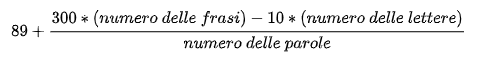



*   lower than 80 are difficult to read for those who have elementary education
*   lower than 60 are difficult to read for those who have secondary school education
*   lower than 40 are difficult to read for those who have  high school diploma








In [ ]:
print('"Unknown":{},'.format(textstat.gulpease_index(Unknown)))
print('"Corpus Svevo":{},'.format(textstat.gulpease_index(Corpus_Svevo)))
print('"Corpus Leopardi":{},'.format(textstat.gulpease_index(Corpus_Leopardi)))
print('"Corpus Pirandello":{},'.format(textstat.gulpease_index(Corpus_Pirandello)))
print('"Corpus Foscolo":{},'.format(textstat.gulpease_index(Corpus_Foscolo)))


"Unknown":61.6,
"Corpus Svevo":56.6,
"Corpus Leopardi":43.6,
"Corpus Pirandello":47.6,
"Corpus Foscolo":54.1,


In [ ]:
authors_readability = {"Unkwnown":61.6,
"Corpus Svevo":56.6,
"Corpus Leopardi":43.6,
"Corpus Pirandello":47.6,
"Corpus Foscolo":54.1,}

readability = pd.DataFrame(list(authors_readability.items()),columns=["author","index"])

print(readability)

              author  index
0           Unkwnown   61.6
1       Corpus Svevo   56.6
2    Corpus Leopardi   43.6
3  Corpus Pirandello   47.6
4     Corpus Foscolo   54.1


***Lexical richness***

In [ ]:
!pip install lexicalrichness

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for lexicalrichness: filename=lexicalrichness-0.1.9-py2.py3-none-any.whl size=11149 sha256=7e78180b8c29c1bd44e228cecb41948ade7c5d065d82f6eaaae8513225c2762e
  Stored in directory: /root/.cache/pip/wheels/23/21/65/0f483857fe1ec4e4c0285fc6f82dd8e1b2a8b17217d135a0f7
Successfully built lexicalrichness


In [ ]:
from lexicalrichness import LexicalRichness

LexicalRichness(Corpus_Leopardi).ttr

0.22484191508581752

Mendelhall curve - An authorial writing style can be investigated also by focusing on word length and their frequency

In [ ]:
print(Corpus_Leopardi)

In questo secolo presente, — sia per l’incremento dello scambievole commercio e dell’uso de’ viaggi, sia per quello della letteratura, e per l’enciclopedico che ora è d’uso, sicché ciascuna nazione vuol conoscere piú a fondo che può le lingue, letterature e costumi degli altri popoli, sia per la scambievole comunione di sventure che è stata fra’ popoli civili, sia perché la Francia abbassata dalle sue perdite, e l’altre nazioni parte per le vittorie, parte per l’aumento della cultura e letteratura di ciasceduna, sollevandosi, — si è introdotta fra le nazioni d’Europa una specie d’uguaglianza di riputazione sì letteraria e civile che militare, laddove per lo passato da’ tempi di Luigi XIV, cioè dall’epoca della diffusa e stabilita civiltá europea, tutte le nazioni avevano spontaneamente ceduto di onore alla Francia che tutte le dispregiava1; per qualcuna, o per tutte queste cagioni, le nazioni civili d’Europa, cioè principalmente la Germania, l’Inghilterra e la Francia stessa hanno depo

Let's see each token length. What is a token? A token is an individual occurrence of a linguistic unit in speech or writing.

In [ ]:
token_Leopardi = [ token for token in Corpus_Leopardi.split()]
word_length_Leopardi = [ len(token) for token in Corpus_Leopardi.split()]

In [ ]:
print(token_Leopardi)
print(word_length_Leopardi)

['In', 'questo', 'secolo', 'presente,', '—', 'sia', 'per', 'l’incremento', 'dello', 'scambievole', 'commercio', 'e', 'dell’uso', 'de’', 'viaggi,', 'sia', 'per', 'quello', 'della', 'letteratura,', 'e', 'per', 'l’enciclopedico', 'che', 'ora', 'è', 'd’uso,', 'sicché', 'ciascuna', 'nazione', 'vuol', 'conoscere', 'piú', 'a', 'fondo', 'che', 'può', 'le', 'lingue,', 'letterature', 'e', 'costumi', 'degli', 'altri', 'popoli,', 'sia', 'per', 'la', 'scambievole', 'comunione', 'di', 'sventure', 'che', 'è', 'stata', 'fra’', 'popoli', 'civili,', 'sia', 'perché', 'la', 'Francia', 'abbassata', 'dalle', 'sue', 'perdite,', 'e', 'l’altre', 'nazioni', 'parte', 'per', 'le', 'vittorie,', 'parte', 'per', 'l’aumento', 'della', 'cultura', 'e', 'letteratura', 'di', 'ciasceduna,', 'sollevandosi,', '—', 'si', 'è', 'introdotta', 'fra', 'le', 'nazioni', 'd’Europa', 'una', 'specie', 'd’uguaglianza', 'di', 'riputazione', 'sì', 'letteraria', 'e', 'civile', 'che', 'militare,', 'laddove', 'per', 'lo', 'passato', 'da’', 

word length in terms of letters

In [ ]:
from collections import Counter
count_word_length_Leopardi = Counter(word_length_Leopardi)

print(count_word_length_Leopardi)

Counter({2: 1582, 3: 1512, 5: 1488, 1: 1184, 6: 1036, 4: 935, 7: 869, 8: 704, 9: 503, 10: 419, 11: 324, 12: 221, 13: 131, 14: 78, 15: 46, 16: 23, 18: 10, 17: 10, 19: 1})


In [ ]:
list_words_Leopardi = sorted(count_word_length_Leopardi.items())

print(list_words_Leopardi)

[(1, 1184), (2, 1582), (3, 1512), (4, 935), (5, 1488), (6, 1036), (7, 869), (8, 704), (9, 503), (10, 419), (11, 324), (12, 221), (13, 131), (14, 78), (15, 46), (16, 23), (17, 10), (18, 10), (19, 1)]


Let's visualize it in a chart

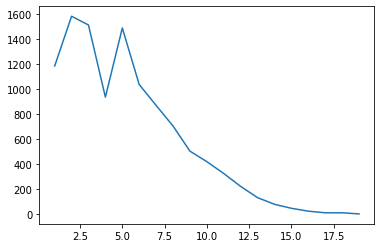

In [ ]:
x,y = zip(*list_words_Leopardi)
plt.plot(x,y)

Text(0.5, 1.0, 'Luigi Pirandello')

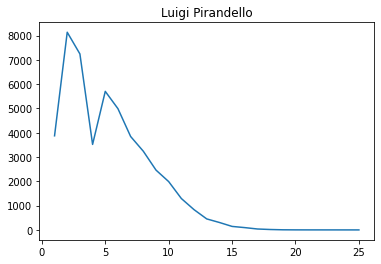

In [ ]:
words_Leopardi = [ token for token in Corpus_Leopardi.split()]
word_length_Leopardi = [ len(token) for token in Corpus_Leopardi.split()]

words_Svevo = [ token for token in Corpus_Svevo.split()]
word_length_Svevo = [ len(token) for token in Corpus_Svevo.split()]

words_Pirandello = [ token for token in Corpus_Pirandello.split()]
word_length_Pirandello = [ len(token) for token in Corpus_Pirandello.split()]

words_Foscolo = [ token for token in Corpus_Foscolo.split()]
word_length_Foscolo = [ len(token) for token in Corpus_Foscolo.split()]

words_Sconosciuto = [ token for token in Unknown.split()]
word_length_Sconosciuto = [ len(token) for token in Unknown.split()]

from collections import Counter
count_word_length_Leopardi = Counter(word_length_Leopardi)
count_word_length_Svevo = Counter(word_length_Svevo)
count_word_length_Pirandello = Counter(word_length_Pirandello)
count_word_length_Foscolo = Counter(word_length_Foscolo)
count_word_length_Unknown = Counter(word_length_Sconosciuto)


list_words_Leopardi = sorted(count_word_length_Leopardi.items())
list_words_Svevo = sorted(count_word_length_Svevo.items())
list_words_Pirandello = sorted(count_word_length_Pirandello.items())
list_words_Foscolo = sorted(count_word_length_Foscolo.items())
list_words_Unknown = sorted(count_word_length_Unknown.items())



x,y = zip(*list_words_Pirandello)
plt.plot(x,y)
plt.title("Luigi Pirandello")




([<matplotlib.axis.XTick at 0x7fd4ac844c50>,
 <a list of 22 Text major ticklabel objects>)

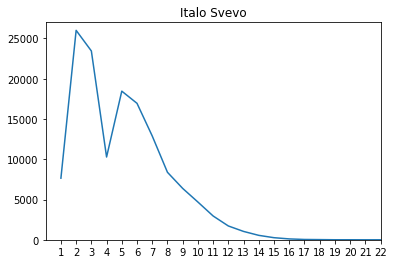

In [ ]:
x,y = zip(*list_words_Svevo)
plt.plot(x,y)
plt.xlim([0,20])
plt.ylim([0,27000])
plt.title("Italo Svevo")

new_list = range(math.floor(min(x)), math.ceil(max(x))+1)
plt.xticks(new_list)



Text(0.5, 1.0, 'Ugo Foscolo')

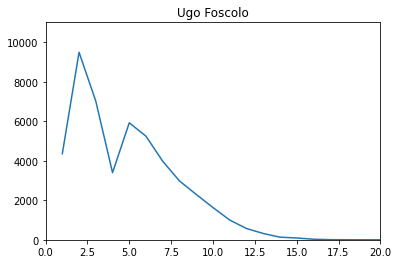

In [ ]:
x,y = zip(*list_words_Foscolo)
plt.plot(x,y)
plt.xlim([0,20])
plt.ylim([0,11000])
plt.title("Ugo Foscolo")




Text(0.5, 1.0, 'Giacomo Leopardi')

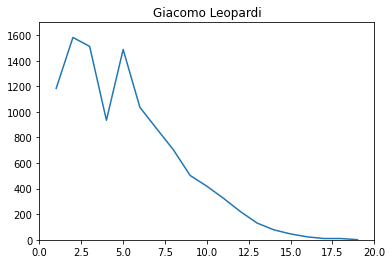

In [ ]:
x,y= zip(*list_words_Leopardi)
plt.plot(x,y)
plt.xlim([0,20])
plt.ylim([0,1700])
plt.title("Giacomo Leopardi")

Text(0.5, 1.0, 'Unknown')

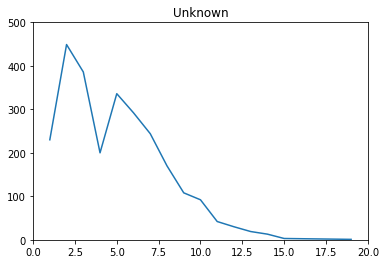

In [ ]:
x,y= zip(*list_words_Unknown)
plt.plot(x,y)
plt.xlim([0,20])
plt.ylim([0,500])
plt.title("Unknown")

***COMPARISON***


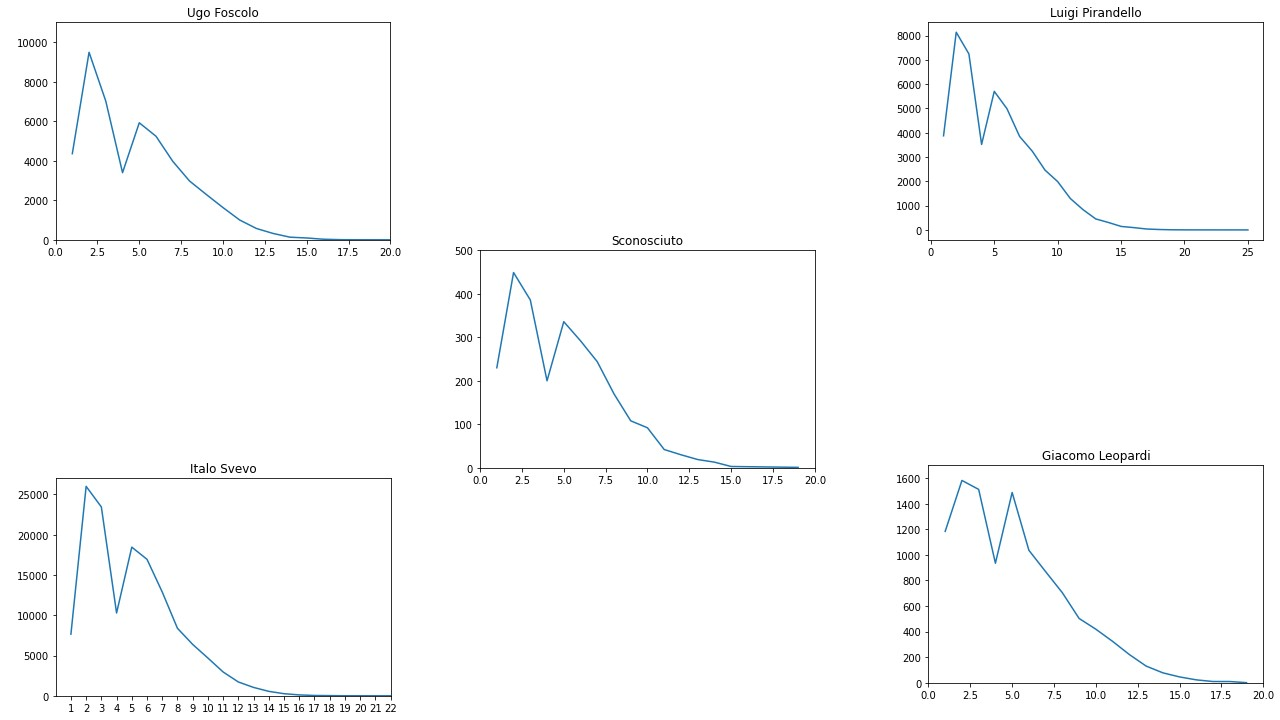
